<a href="https://colab.research.google.com/github/rileenas/ML-projects/blob/ML-Final-Year-Project--University-of-Mumbai--Environmental-Audio-Classification/Environmental_Sound_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EDA:** Exploratory Data Analysis

In [ ]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
filename='/content/drive/MyDrive/UrbanSound8k/UrbanSound8K/audio/fold1/101415-3-0-2.wav'

In [ ]:
import IPython.display as ipd
import librosa
import librosa.display

In [ ]:
!dir

Audio-Classification  sample_data


Waveform analysis

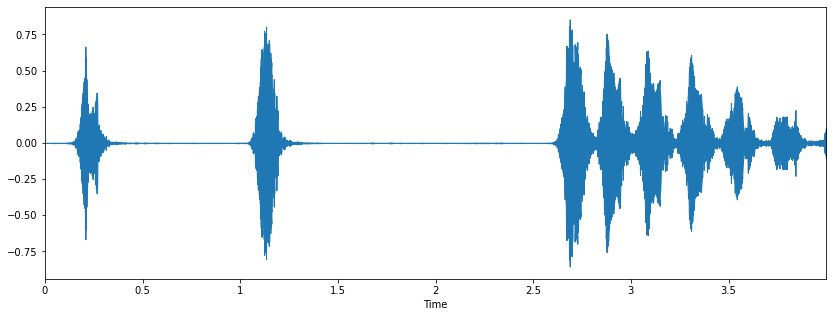

In [ ]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [ ]:
sample_rate

22050

In [ ]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [ ]:
wave_sample_rate

48000

In [ ]:
wave_audio

array([   -5,    -5,    -6, ..., -1576, -1566, -1557], dtype=int16)

In [ ]:
data

array([-0.00011783, -0.00017157, -0.00017749, ..., -0.04598654,
       -0.04624664, -0.05089863], dtype=float32)

Dataset analysis

In [ ]:
import pandas as pd

In [ ]:
metadata=pd.read_csv('/content/drive/MyDrive/UrbanSound8k/UrbanSound8K/metadata/UrbanSound8K.csv')

In [ ]:
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


Checking for imbalance in dataset

In [ ]:
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

From the above output, we know that the dataset is balanced

**Audio Classification Data Preprocessing**

Reading an audio data with librosa

In [ ]:
import librosa

In [ ]:
audio_file_path='/content/drive/MyDrive/UrbanSound8k/UrbanSound8K/audio/fold3/103199-4-1-0.wav'

In [ ]:
librosa_audio_data, librosa_sample_rate=librosa.load(audio_file_path)

In [ ]:
print(librosa_audio_data)

[0.         0.         0.         ... 0.08429936 0.12048078 0.14400633]


Plotting the audio data

In [ ]:
plt.figure(figsize=(14,5))

<Figure size 1008x360 with 0 Axes>

<Figure size 1008x360 with 0 Axes>

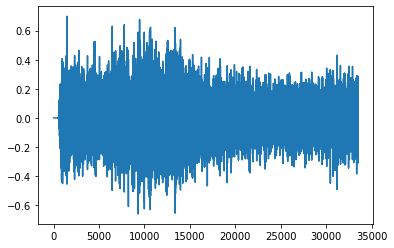

In [ ]:
plt.plot(librosa_audio_data)

**Observation**

Librosa converts the signal to mono. Hence, the channel will always be 1

Reading with scipy

In [ ]:
wave_sample_rate, wave_audio=wav.read(audio_file_path)

In [ ]:
wave_audio

array([[   0,    0],
       [   0,    0],
       [   0,    0],
       ...,
       [4700, 4547],
       [5104, 4233],
       [4358, 3284]], dtype=int16)

In [ ]:
plt.figure(figsize=(14,5))

<Figure size 1008x360 with 0 Axes>

<Figure size 1008x360 with 0 Axes>

Original audio with two channels:

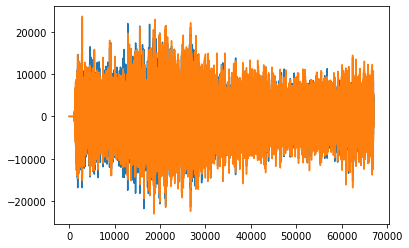

In [ ]:
plt.plot(wave_audio)

**Feature extraction**

Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [ ]:
mfccs=librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)

In [ ]:
print(mfccs.shape)

(40, 66)


In [ ]:
mfccs

array([[-2.67838715e+02, -9.90601349e+01, -4.72766075e+01, ...,
        -8.17866669e+01, -8.15595398e+01, -7.18166504e+01],
       [ 5.38834877e+01,  5.78546295e+01,  5.70501709e+01, ...,
         4.48684807e+01,  4.74147339e+01,  6.31869354e+01],
       [-9.96457214e+01, -1.00181686e+02, -1.04073936e+02, ...,
        -1.18475655e+02, -1.15439590e+02, -1.03858658e+02],
       ...,
       [ 2.50440311e+00,  6.65297318e+00,  7.73529053e+00, ...,
         3.23667812e+00, -2.29420185e-01, -4.26398706e+00],
       [ 1.78306735e+00,  3.65672255e+00,  6.19689131e+00, ...,
        -8.32287192e-01, -3.38403225e+00, -5.59343004e+00],
       [ 8.89105129e+00,  1.38278770e+00,  3.40625525e-01, ...,
         2.49111032e+00,  8.08057785e-01, -3.45306325e+00]], dtype=float32)

Extracting MFCC for every audio file

In [ ]:
import os

In [ ]:
audio_dataset_path='/content/drive/MyDrive/UrbanSound8k/UrbanSound8K/audio'

In [ ]:
!dir

In [ ]:
metadata=pd.read_csv('/content/drive/MyDrive/UrbanSound8k/UrbanSound8K/metadata/UrbanSound8K.csv')

In [ ]:
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [ ]:
def features_extractor(file):
  audio, sample_rate=librosa.load(file_name, res_type='kaiser_fast')
  mfccs_features=librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
  mfccs_scaled_features=np.mean(mfccs_features.T, axis=0)

  return mfccs_scaled_features

In [ ]:
import numpy as np
from tqdm import tqdm

Extracting features from the audio files 

In [ ]:
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [18:50,  3.20it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
8326it [42:42,  4.82it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
8329it [42:43,  5.08it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
8732it [44:37,  3.26it/s]


Converting extracted features to Pandas dataframe

In [ ]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.09133, ...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265705,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.60859, 1.6...",children_playing


Splitting the dataset into independent and dependent datasets

In [ ]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [ ]:
X.shape

(8732, 40)

In [ ]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

Label encoding

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

**Train-Test split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train

array([[-1.3183614e+02,  1.1397464e+02, -2.3956861e+01, ...,
         3.3314774e+00, -1.4786111e+00,  2.8736601e+00],
       [-1.4074220e+01,  9.1916939e+01, -8.6787205e+00, ...,
        -3.3844025e+00, -5.2119040e+00, -1.5936139e+00],
       [-4.9532028e+01,  1.5521857e-01, -2.0369110e+01, ...,
         2.0491767e+00, -8.0537486e-01,  2.7793026e+00],
       ...,
       [-4.2699329e+02,  9.2890648e+01,  3.0233369e+00, ...,
         8.6335993e-01,  6.4766800e-01,  7.8490508e-01],
       [-1.4607024e+02,  1.3709459e+02, -3.4298344e+01, ...,
         1.3777871e+00, -1.9530842e+00, -8.9652115e-01],
       [-4.2167450e+02,  2.1169032e+02,  2.6820304e+00, ...,
        -5.1484952e+00, -3.6400859e+00, -1.3321606e+00]], dtype=float32)

In [ ]:
y

In [ ]:
X_train.shape

(6985, 40)

In [ ]:
X_test.shape

(1747, 40)

In [ ]:
y_train.shape

(6985, 10)

In [ ]:
y_test.shape

(1747, 10)

**Model Creation**

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

No. of classes

In [ ]:
num_labels=y.shape[1]

In [ ]:
model=Sequential()

First layer

In [ ]:
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

Second layer

In [ ]:
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

Third layer

In [ ]:
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

Final layer

In [ ]:
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

Training the model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
213/219 [============================>.] - ETA: 0s - loss: 13.7458 - accuracy: 0.1203
Epoch 1: val_loss improved from inf to 2.29256, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 2s 4ms/step - loss: 13.4870 - accuracy: 0.1210 - val_loss: 2.2926 - val_accuracy: 0.1173
Epoch 2/100
207/219 [===========================>..] - ETA: 0s - loss: 2.6406 - accuracy: 0.1262
Epoch 2: val_loss improved from 2.29256 to 2.28438, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 2.6321 - accuracy: 0.1261 - val_loss: 2.2844 - val_accuracy: 0.1076
Epoch 3/100
208/219 [===========================>..] - ETA: 0s - loss: 2.3604 - accuracy: 0.1239
Epoch 3: val_loss improved from 2.28438 to 2.27721, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 2.3578 - accuracy: 0.1230 - val_loss: 2.2772 - val_accuracy: 0.10

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7475672364234924


In [ ]:
X_test[1]

array([-466.1843    ,    1.5388287 ,  -34.397358  ,   35.715336  ,
        -15.16693   ,  -18.850813  ,   -0.7415814 ,  -15.999888  ,
        -21.354332  ,    7.650683  ,  -29.03145   ,  -19.142824  ,
         -2.6798913 ,   -8.466883  ,  -14.7660475 ,   -7.004778  ,
         -7.103754  ,    8.887754  ,   14.911873  ,   21.47102   ,
         21.336626  ,    0.9169517 ,  -18.795404  ,   -5.001721  ,
         -0.70152706,    2.9139898 ,   -6.710599  ,  -16.638536  ,
         -9.821647  ,   12.8619585 ,    0.6552978 ,  -23.953394  ,
        -15.200551  ,    9.210791  ,   10.419799  ,   -0.57916135,
         -1.2440345 ,   17.722294  ,   13.837573  ,   -5.164349  ],
      dtype=float32)

In [ ]:
model.predict(X_test)

array([[5.87590912e-04, 3.37912963e-04, 7.83416850e-04, ...,
        1.49366144e-07, 7.79818292e-05, 8.54631234e-03],
       [2.65575864e-06, 6.21613394e-03, 7.83625394e-02, ...,
        1.32216272e-07, 9.72304307e-03, 3.20940018e-02],
       [2.67769168e-10, 6.72789523e-03, 5.72868332e-04, ...,
        4.90444887e-04, 2.89646846e-06, 5.64837316e-03],
       ...,
       [1.72261136e-10, 9.77707684e-01, 8.88442386e-08, ...,
        7.00389128e-13, 8.07280571e-08, 2.12528408e-02],
       [1.71500608e-01, 1.26891285e-02, 3.42890799e-01, ...,
        3.29352580e-02, 1.81104112e-02, 2.21841767e-01],
       [1.43133253e-01, 1.92933474e-02, 2.52034307e-01, ...,
        2.72230338e-03, 4.71775867e-02, 1.48772120e-01]], dtype=float32)

**Testing data**

In [ ]:
filename="/content/drive/MyDrive/UrbanSound8k/UrbanSound8K/audio/fold7/102853-8-0-6.wav"

In [ ]:
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')

In [ ]:
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)

In [ ]:
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

In [ ]:
print(mfccs_scaled_features)

[-1.9783899e+02  1.2787831e+02 -3.6800564e+01  8.2063026e+00
 -2.2798037e+01  2.3630716e+01 -6.9696770e+00  1.9098980e+01
 -9.9032326e+00  1.1502538e+01 -7.9724460e+00  5.7064857e+00
 -1.6717522e+01  6.7899437e+00 -7.9210749e+00  6.2614970e+00
 -1.2482746e+01  3.8461897e+00 -5.8185816e+00  8.2661800e+00
 -4.2827330e+00  4.1418581e+00 -3.1972375e+00  4.2274070e+00
 -8.7601626e-01  2.2577782e+00 -2.5548141e+00  3.9276240e+00
 -2.4457712e+00  1.4438518e+00 -2.2824237e+00  1.6329913e+00
 -1.5668702e+00  2.1979580e+00 -2.0268118e+00  1.0128217e+00
 -1.5257117e+00 -2.5363371e-02 -2.5509217e+00  1.2732873e+00]


In [ ]:
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)

In [ ]:
print(mfccs_scaled_features)

[[-1.9783899e+02  1.2787831e+02 -3.6800564e+01  8.2063026e+00
  -2.2798037e+01  2.3630716e+01 -6.9696770e+00  1.9098980e+01
  -9.9032326e+00  1.1502538e+01 -7.9724460e+00  5.7064857e+00
  -1.6717522e+01  6.7899437e+00 -7.9210749e+00  6.2614970e+00
  -1.2482746e+01  3.8461897e+00 -5.8185816e+00  8.2661800e+00
  -4.2827330e+00  4.1418581e+00 -3.1972375e+00  4.2274070e+00
  -8.7601626e-01  2.2577782e+00 -2.5548141e+00  3.9276240e+00
  -2.4457712e+00  1.4438518e+00 -2.2824237e+00  1.6329913e+00
  -1.5668702e+00  2.1979580e+00 -2.0268118e+00  1.0128217e+00
  -1.5257117e+00 -2.5363371e-02 -2.5509217e+00  1.2732873e+00]]


In [ ]:
print(mfccs_scaled_features.shape)

(1, 40)


In [ ]:
predicted_label=model.predict(mfccs_scaled_features)

In [ ]:
print(predicted_label)

[[0.0086093  0.03757077 0.00700331 0.02996328 0.05236047 0.07459701
  0.00372618 0.4526005  0.29685834 0.03671078]]


In [ ]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

In [ ]:
predict_x

array([[5.87590912e-04, 3.37912963e-04, 7.83416850e-04, ...,
        1.49366144e-07, 7.79818292e-05, 8.54631234e-03],
       [2.65575864e-06, 6.21613394e-03, 7.83625394e-02, ...,
        1.32216272e-07, 9.72304307e-03, 3.20940018e-02],
       [2.67769168e-10, 6.72789523e-03, 5.72868332e-04, ...,
        4.90444887e-04, 2.89646846e-06, 5.64837316e-03],
       ...,
       [1.72261136e-10, 9.77707684e-01, 8.88442386e-08, ...,
        7.00389128e-13, 8.07280571e-08, 2.12528408e-02],
       [1.71500608e-01, 1.26891285e-02, 3.42890799e-01, ...,
        3.29352580e-02, 1.81104112e-02, 2.21841767e-01],
       [1.43133253e-01, 1.92933474e-02, 2.52034307e-01, ...,
        2.72230338e-03, 4.71775867e-02, 1.48772120e-01]], dtype=float32)

In [ ]:
classes_x

array([5, 3, 4, ..., 1, 2, 5])

In [ ]:
filename="/content/drive/MyDrive/UrbanSound8k/UrbanSound8K/audio/fold4/110621-7-0-1.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predict_1=model.predict(mfccs_scaled_features)
predicted_label=np.argmax(predict_1, axis=1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-5.0722397e+01  8.3431381e+01  2.2848343e+01  4.4969620e+01
 -1.2246111e+01  3.2016476e+01 -1.8616095e+01  2.2631695e+01
 -1.0759132e+01  7.5172234e+00 -6.4052835e+00  7.0130663e+00
 -1.3375360e+01  8.0841532e+00 -9.3931580e+00  1.1368268e+01
 -5.2930002e+00  6.9304624e+00 -1.4509041e+00  1.0090609e+00
 -1.0958774e+00  1.0010127e+00 -2.2731009e+00  7.8751383e+00
 -5.3240213e+00  8.6126862e+00 -4.6462927e+00  4.2976885e+00
 -2.1037310e-01 -7.8781813e-02  5.0268251e-01 -1.8391018e+00
 -2.2697103e+00  2.3061194e+00 -1.7231038e+00  2.5923584e+00
 -1.0324645e+00  1.1264440e+00 -1.7245343e-02  3.1516898e+00]
[[-5.0722397e+01  8.3431381e+01  2.2848343e+01  4.4969620e+01
  -1.2246111e+01  3.2016476e+01 -1.8616095e+01  2.2631695e+01
  -1.0759132e+01  7.5172234e+00 -6.4052835e+00  7.0130663e+00
  -1.3375360e+01  8.0841532e+00 -9.3931580e+00  1.1368268e+01
  -5.2930002e+00  6.9304624e+00 -1.4509041e+00  1.0090609e+00
  -1.0958774e+00  1.0010127e+00 -2.2731009e+00  7.8751383e+00
  -5.3240213e+00 

array(['jackhammer'], dtype='<U16')

In [ ]:
ipd.Audio(filename)